# Log 파일을 분단위로 잘라서 저장해봅시다.

In [3]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('../dataset/track1.csv', index_col = "Timestamp")

In [4]:
df.index = pd.to_datetime(df.index)

## 우리가 공격자라고 생각하는 호스트는 전부 공격자야!!

In [31]:
df['Attack'] = 0
df.head()

,Method,Protocol,Status,Referer,Path,Host,UA,Payload,Bytes,Attack
Timestamp,,,,,,,,,,
2020-08-24 10:00:18,GET,HTTP/1.1,200,"""-""",/1000/wp-includes/,101.224.32.28,Mozilla/5.0 (Macintosh; Intel Mac OS X x.y; rv...,-,6226.0,0
2020-08-24 10:00:18,GET,HTTP/1.1,200,"""-""",/1000/wp-login/,101.224.32.28,Mozilla/5.0 (Macintosh; Intel Mac OS X x.y; rv...,-,6226.0,0
2020-08-24 10:00:18,GET,HTTP/1.1,200,"""-""",/1000/wp-register/,101.224.32.28,Mozilla/5.0 (Macintosh; Intel Mac OS X x.y; rv...,-,6232.0,0
2020-08-24 10:00:18,GET,HTTP/1.1,200,"""-""",/1000/wp/,101.224.32.28,Mozilla/5.0 (Macintosh; Intel Mac OS X x.y; rv...,-,6248.0,0
2020-08-24 10:00:19,GET,HTTP/1.1,200,"""-""",/1000/wp-content/,101.224.32.28,Mozilla/5.0 (Macintosh; Intel Mac OS X x.y; rv...,-,6224.0,0


In [39]:
attacker = ['101.224.32.28', '231.211.11.16', '137.8.46.133', '100.200.156.222', '112.112.181.134', '188.45.31.10', '188.45.31.20', '188.45.31.30', '188.45.31.40', '14.135.56.110', '14.135.56.120', '14.135.56.130', '14.135.56.140']

In [40]:
df['Attack'] = np.where(df['Host'].isin(attacker), 1, 0)

In [41]:
df.head()

,Method,Protocol,Status,Referer,Path,Host,UA,Payload,Bytes,Attack
Timestamp,,,,,,,,,,
2020-08-24 10:00:18,GET,HTTP/1.1,200,"""-""",/1000/wp-includes/,101.224.32.28,Mozilla/5.0 (Macintosh; Intel Mac OS X x.y; rv...,-,6226.0,1
2020-08-24 10:00:18,GET,HTTP/1.1,200,"""-""",/1000/wp-login/,101.224.32.28,Mozilla/5.0 (Macintosh; Intel Mac OS X x.y; rv...,-,6226.0,1
2020-08-24 10:00:18,GET,HTTP/1.1,200,"""-""",/1000/wp-register/,101.224.32.28,Mozilla/5.0 (Macintosh; Intel Mac OS X x.y; rv...,-,6232.0,1
2020-08-24 10:00:18,GET,HTTP/1.1,200,"""-""",/1000/wp/,101.224.32.28,Mozilla/5.0 (Macintosh; Intel Mac OS X x.y; rv...,-,6248.0,1
2020-08-24 10:00:19,GET,HTTP/1.1,200,"""-""",/1000/wp-content/,101.224.32.28,Mozilla/5.0 (Macintosh; Intel Mac OS X x.y; rv...,-,6224.0,1


## 공격자가 하나라도 있던 로그는 말이야... 전부 공격이 있었던 시간이야!!!

In [61]:
for minute in range(60):
    splitByMinute = df['2020-08-24 10:{0:02d}'.format(minute)]
    if len(splitByMinute[splitByMinute['Attack'] == 1]) > 0:
        splitByMinute.to_csv('../split_by_1min/2020-08-24_10-{0:02d}-1.csv'.format(minute), header=None)
    else:
        splitByMinute.to_csv('../split_by_1min/2020-08-24_10-{0:02d}-0.csv'.format(minute), header=None)

# 오랜만에 OpenCV 등장...
## Jupyter notebook 상에서 실험하기 좋은 코드... imshow!!

In [15]:
def imshow(tit, image):
    plt.figure(figsize=(9,9))
    plt.title(tit)
    if len(image.shape) == 3:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(image, cmap="gray")
    plt.show()

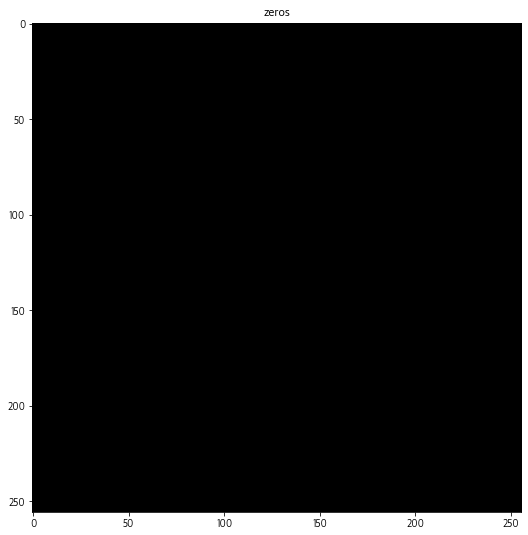

In [26]:
empty = np.zeros([256,256])
empty
imshow('zeros',empty)

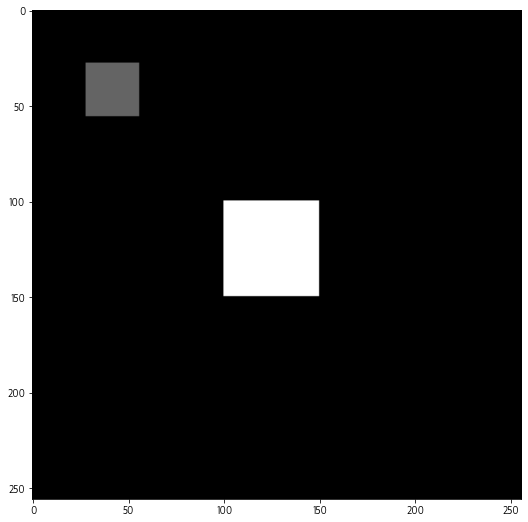

In [113]:
empty[28:56,28:56] = 100
empty[100:150,100:150] = 255
empty = empty.astype(np.uint8)
imshow('',empty)

In [74]:
with open('../hex_by_1min/2020-08-24_10-00-1.hex') as file :
    data = file.read()
    
data = bytes.fromhex(data[0:])

In [96]:
hex1 = pd.read_csv('../hex_by_1min/2020-08-24_10-00-1.csv', sep="  ", header=None)

/usr/local/Caskroom/miniconda/base/envs/py_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [97]:
hex1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0000000,NaN,3032,NaN,3032,NaN,302d,NaN,2d38,NaN,3432,NaN,3120,NaN,3a30,NaN,3030
1,0000010,NaN,313a,NaN,2c38,NaN,4547,NaN,2c54,NaN,5448,NaN,5054,NaN,312f,NaN,312e
2,0000020,NaN,322c,NaN,3030,NaN,222c,NaN,2222,NaN,222d,NaN,2222,NaN,2f2c,NaN,3031
3,0000030,NaN,3030,NaN,772f,NaN,2d70,NaN,6e69,NaN,6c63,NaN,6475,NaN,7365,NaN,2c2f
4,0000040,NaN,3031,NaN,2e31,NaN,3232,NaN,2e34,NaN,3233,NaN,322e,NaN,2c38,NaN,6f4d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,00005c0,NaN,203b,NaN,7672,NaN,343a,NaN,2e32,NaN,2930,NaN,4720,NaN,6365,NaN,6f6b
93,00005d0,NaN,322f,NaN,3130,NaN,3030,NaN,3031,NaN,2031,NaN,6946,NaN,6572,NaN,6f66
94,00005e0,NaN,2f78,NaN,3234,NaN,302e,NaN,2d2c,NaN,312c,NaN,3335,NaN,302e,NaN,312c
95,00005f0,NaN,000a,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None


In [106]:
from subprocess import call

In [107]:
call('pwd')

0